boston housing
입력이 continuous, 출력도 continuous한 regression

In [2]:
# description
# https://www.kaggle.com/c/boston-housing

# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.boston_housing.load_data(path='boston_housing.npz')

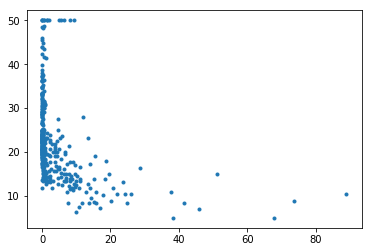

In [25]:
plt.plot(x_train[:,0], y_train, '.') # '.'은 점으로 나타낸다는 의미
# 그래프에서 y값은 집값을 의미한다. x는 crime rate
# crime rate이 높을 수록 집값이 낮다.

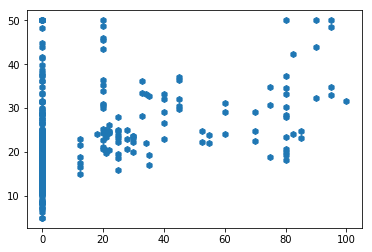

In [26]:
plt.plot(x_train[:,1], y_train, '.') # 두번째 factor인 amount of residential rot의 집값과의 관계를 보여줌

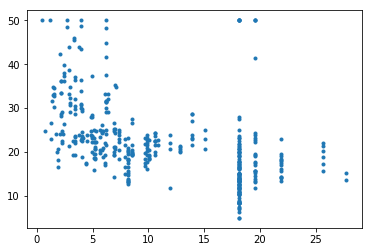

In [27]:
plt.plot(x_train[:,2], y_train, '.')

In [10]:
x_train.shape # 13개로 구성된 sample data의 개수가 404개 있다

(404, 13)

In [24]:
x_train[:,1], y_train # 13개의 x중 첫번째 factor(crime)이 가격 y에 미치는 영향 x_train[:1]로 하면 2번째 factor가 미치는 영향을 볼 수 있다.

(array([  0. ,  82.5,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  70. ,
         82.5,   0. ,   0. ,  75. ,  95. ,  18. ,   0. ,   0. ,  12.5,
          0. ,   0. ,   0. ,  52.5,   0. ,   0. ,   0. ,  75. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,  20. ,   0. ,   0. ,   0. ,   0. ,  52.5,
          0. ,   0. ,   0. ,   0. ,  40. ,   0. ,   0. ,  20. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         45. ,   0. ,   0. ,  12.5,   0. ,   0. ,  25. ,   0. ,   0. ,
         20. ,   0. ,  55. ,   0. ,   0. ,   0. ,  95. ,   0. ,   0. ,
          0. ,  95. ,   0. ,   0. ,   0. ,  30. ,  95. ,   0. ,  60. ,
          0. ,  20. ,   0. ,   0. ,   0. ,   0. ,  22. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  85. ,   0. ,   0. ,
         12.5,   0. ,  80. ,   0. ,   0. ,   0. ,  90. ,   0. ,   0. ,
      

In [8]:
x_test.shape

(102, 13)

In [9]:
y_test # 102개의 y

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

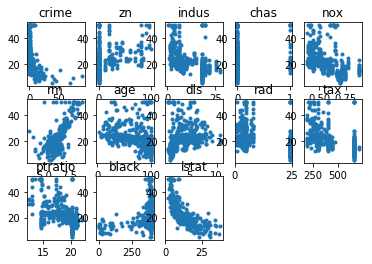

In [30]:
#한꺼번에 plot하기
boston_housing = ['crime','zn','indus','chas','nox','rm','age','dls','rad','tax','ptratio','black','lstat'] # 각각의 title 지정
for i in range(13): #range는 0,1,2,3...12 이렇게 들어간다.
    plt.subplot(3,5,i+1) #3행 5열의 plot구획 나누기 i+1으로, i에는 range가 0부터 12까지 들어오고 있음.
    plt.plot(x_train[:,i], y_train, '.')
    plt.title(boston_housing[i])  # 각각의 title 지정
plt.show()    

ㄴ rm과 black, lstat은 비교적 linear하게, 쉽게 드러남. rm의 경우 방이 많으면 집값이 높아지고 lower state가 많으면 집값이 내려간다.
black은 자체의 함수가 조금 다른듯

tax의 경우 tax가 낮으면 집값이 높다.

In [ ]:
plt.plot(x_train)

In [33]:
model = Sequential()
model.add(Dense(1, input_shape=[13])) # 입력이 13개 출력이 1개
model.compile(optimizer='rmsprop', loss='mse') # regression의 경우 : (optimizer='rmsprop', loss='mse')
model.summary() # parameter number(#)가 13개가 아니라 14개 인 이유 - a1x1+a2x2+...a13x13+b에서 +b까지 반영한 것

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
404/404 [==============================] - 0s 91us/sample - loss: 27.5909
Epoch 2/10
404/404 [==============================] - 0s 81us/sample - loss: 27.7799
Epoch 3/10
404/404 [==============================] - 0s 79us/sample - loss: 27.3016
Epoch 4/10
404/404 [==============================] - 0s 71us/sample - loss: 26.9947
Epoch 5/10
404/404 [==============================] - 0s 67us/sample - loss: 27.5679
Epoch 6/10
404/404 [==============================] - 0s 64us/sample - loss: 27.5729
Epoch 7/10
404/404 [==============================] - 0s 82us/sample - loss: 27.4666
Epoch 8/10
404/404 [==============================] - 0s 86us/sample - loss: 27.2289
Epoch 9/10
404/404 [==============================] - 0s 76us/sample - loss: 27.7748
Epoch 10/10
404/404 [==============================] - 0s 84us/sample - loss: 27.1309


In [35]:
model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 792us/sample - loss: 30.3416


30.341600754681757

In [78]:
print(model.input_shape)
print(model.output_shape)

(None, 13)
(None, 1)


In [36]:
# hidden layer를 넣는 방법
model = Sequential()
model.add(Dense(10, input_shape=[13])) # 중간에 10개짜리 hidden layer추가 
model.add(Dense(20)) # 20개짜리 hidden layer추가. 총 hidden layer의 개수가 2개가 되었다.
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse') # regression에서는 rmsprop과 mse를 쓴다. classification에서는 adam과 엔트로피를 쓴다.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
404/404 [==============================] - 1s 2ms/sample - loss: 22638.1229
Epoch 2/10
404/404 [==============================] - 0s 104us/sample - loss: 1561.1283
Epoch 3/10
404/404 [==============================] - 0s 91us/sample - loss: 204.8928
Epoch 4/10
404/404 [==============================] - 0s 99us/sample - loss: 193.4705
Epoch 5/10
404/404 [==============================] - 0s 89us/sample - loss: 187.7264
Epoch 6/10
404/404 [==============================] - 0s 91us/sample - loss: 194.1868
Epoch 7/10
404/404 [==============================] - 0s 64us/sample - loss: 183.7485
Epoch 8/10
404/404 [==============================] - 0s 84us/sample - loss: 184.7473
Epoch 9/10
404/404 [==============================] - 0s 90us/sample - loss: 171.4150
Epoch 10/10
404/404 [==============================] - 0s 86us/sample - loss: 127.9252


In [43]:
model = Sequential()
model.add(Dense(10, input_shape=[13], activation = 'relu')) # 중간에 10개짜리 hidden layer에 activation relu를 넣어 non-linearity를 추가
model.add(Dense(1)) # No activation for output layer
model.compile(optimizer='rmsprop', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


parameter number #
1) parameter는 그림에서 화살표의 개수, 즉 y=ax+b의 a 부분을 담당한다.
입력 13개 + b까지 포함하여 화살표 14 x hidden layer의 node 10개 = 140개의 parameter가 나온다.
2) hidden layer에서 그 다음 layer (output)으로 들어 갈때, 
화살표 10개 + hidden node의 b 값 부분을 포함하여 11개의 parameter가 존재한다.

activation
sigmoid, tan h, relu등을 중간의 layer들에게 activation으로 줄 수 있다.
regression 일때는 output layer에 activation을 주지 않음
classification일때는 output layer에 sigmoid(binary한 결과값)나 soft max(for multiple choice)
따라서 지금 boston housing에서 히든 레이어에 relu를 주었지만 regression이기 때문에 아웃풋 레이어에 activation을 주지 않았다.

In [105]:
# INPUT::
# 1. crim: per capita crime rate by town.
# 2. zn: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3. indus: proportion of non-retail business acres per town.
# 4. chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# 5. nox: nitrogen oxides concentration (parts per 10 million).
# 6. rm: average number of rooms per dwelling.
# 7. age: proportion of owner-occupied units built prior to 1940.
# 8. dis: weighted mean of distances to five Boston employment centres.
# 9. rad: index of accessibility to radial highways.
# 10. tax: full-value property-tax rate per $10,000.
# 11. ptratio: pupil-teacher ratio by town.
# 12. black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# 13. lstat: lower status of the population (percent).

# TARGET::
# medv: median value of owner-occupied homes in $1000s.

model.predict(np.array([0, 1, 50, 1, 0, 5, .5, 10, 1000, 100, 10, 100, 1]).reshape(1,13))

array([[190.32436]], dtype=float32)